# 10.11 단순 RNN과 LSTM, GPU 모델의 비교 - 시퀀스 데이터 준비
***

In [1]:
# 연속된 숫자 시퀀스 데이터와 레이블을 활용하여 순환 신경망의 모델이 잘 작동하는지 확인
import numpy as np

# 데이터를 생성하기 위한 sequence_gen() 함수 사용
# 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성
# seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성
def sequence_gen(size, seq_len):
  # 비어있는 넘파이 배열 생성
  seq_X = np.empty(shape=(size, seq_len, 1))
  Y = np.empty(shape=(size,))

  for i in range(size):
    # [0, 0.1, 0.2, .. ] 같은 시퀀스와 Y 값을 size 갯수만큼 생성
    c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
    # 새로운 축을 하나 더 추가
    seq_X[i] = c[:, np.newaxis]
    # 목표값 생성
    Y[i] = (i+seq_len) / 10
  
  return seq_X, Y

# 길이가 16인 시퀀스 8개를 훈련용으로 만든다
n, seq_len = 8, 16
train_seq_X, train_Y = sequence_gen(n, seq_len)


In [2]:
# 이전에 만든 훈련용 데이터를 flatten()함수를 활용하여 1줄씩 출력
print('훈련용 데이터')
for i in range(n):
  print(train_seq_X[i].flatten(), train_Y[i])

half_n, offset = int(n/2), 1.0
# 1.0만큼의 offset을 더해 테스트 셋 구성
test_seq_X = train_seq_X[:half_n] + offset
# 테스트 셋의 레이블 구성
test_Y = train_Y[:half_n] + offset

# 검증용 데이터도 비슷하게 출력
print('검증용 데이터')
for i in range(half_n):
  print(test_seq_X[i].flatten(), test_Y[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3
검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


# 10.11 단순 RNN과 LSTM, GPU 모델의 비교 - 성능 비교
***

In [3]:
# SimpleRNN의 모델 성능
import tensorflow as tf
# 유닛의 개수 256개
n_units = 256
simpleRNN_model = tf.keras.Sequential([
    # 레이어를 구성하는 유닛개수 256개 지정
    tf.keras.layers.SimpleRNN(units = n_units, return_sequences=False,
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

simpleRNN_model.compile(optimizer = 'adam', loss = 'mse')
# 100에폭으로 학습 진행
simpleRNN_model.fit(train_seq_X, train_Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 995ms/step - loss: 4.8106
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0092
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 1.0744
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4044
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0272
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3709
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3466
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1216
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0042
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0422
Epoch 11/100
1/1 [==============================] - 0s 259ms/step - loss: 0.1158
Epoch 12/100
1/1 [==============================] - 0s 23ms/step - loss: 0.1161
Epoch 13/100
1/1 [=============================

In [4]:
# 정답을 잘 예측하는지 확인
result = simpleRNN_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

1/1 [==============================] - 0s 179ms/step
예측값 : [2.4263902 2.4715235 2.511855  2.5478733]
실제값 : [2.6 2.7 2.8 2.9]


In [5]:
# LSTM모델 성능
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = n_units, return_sequences=False,
                         input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer = 'adam', loss = 'mse')
LSTM_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3.2733
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 2.3247
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 1.4714
Epoch 4/100
1/1 [==============================] - 0s 59ms/step - loss: 0.7035
Epoch 5/100
1/1 [==============================] - 0s 40ms/step - loss: 0.1273
Epoch 6/100
1/1 [==============================] - 0s 41ms/step - loss: 0.1630
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.5349
Epoch 8/100
1/1 [==============================] - 0s 42ms/step - loss: 0.3047
Epoch 9/100
1/1 [==============================] - 0s 39ms/step - loss: 0.0613
Epoch 10/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0131
Epoch 11/100
1/1 [==============================] - 0s 42ms/step - loss: 0.0717
Epoch 12/100
1/1 [==============================] - 0s 39ms/step - loss: 0.1442
Epoch 13/100
1/1 [==============================] -

In [6]:
reulst = LSTM_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값', test_Y)

1/1 [==============================] - 0s 480ms/step
예측값 : [2.4263902 2.4715235 2.511855  2.5478733]
실제값 [2.6 2.7 2.8 2.9]


In [7]:
# GRU모델 성능
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = n_units, return_sequences=False,
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

GRU_model.compile(optimizer = 'adam', loss = 'mse')
GRU_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 4.3113
Epoch 2/100
1/1 [==============================] - 0s 62ms/step - loss: 3.2173
Epoch 3/100
1/1 [==============================] - 0s 77ms/step - loss: 2.2892
Epoch 4/100
1/1 [==============================] - 0s 71ms/step - loss: 1.4988
Epoch 5/100
1/1 [==============================] - 0s 71ms/step - loss: 0.8393
Epoch 6/100
1/1 [==============================] - 0s 84ms/step - loss: 0.3317
Epoch 7/100
1/1 [==============================] - 0s 79ms/step - loss: 0.0368
Epoch 8/100
1/1 [==============================] - 0s 86ms/step - loss: 0.0593
Epoch 9/100
1/1 [==============================] - 0s 66ms/step - loss: 0.3433
Epoch 10/100
1/1 [==============================] - 0s 68ms/step - loss: 0.4514
Epoch 11/100
1/1 [==============================] - 0s 57ms/step - loss: 0.3378
Epoch 12/100
1/1 [==============================] - 0s 60ms/step - loss: 0.1747
Epoch 13/100
1/1 [==============================] -

In [8]:
result = GRU_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

1/1 [==============================] - 0s 403ms/step
예측값 : [2.5716743 2.6650834 2.7578063 2.8498316]
실제값 : [2.6 2.7 2.8 2.9]


# LAB 10-2 기억이 필요한 시퀀스 예측
***
## 실습 목표
> - 사인 곡선에서 일부분을 잘라 만든 시퀀스의 각 요소 각각에 임의의 난수 인덱스를 부여하자. 이번에는 이 시퀀스의 다음 값을 예측하는 것이 아니라, 시퀀스의 각 요소들 가운데 짝수 인덱스를 가진 요소들의 평균 값을 계산하는 모델을 만들어 보자.

***


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 시퀀스의 개수 200개 시퀀스의 길이 30으로 설정
size, seq_len = 200, 30
# 비어있는 넘파이 배열 생성
# 각 시퀀스에 인덱스가 존재
seq_X = np.empty(shape=(size, seq_len, 2))
# 각 시퀀스의 정답을 담은 변수생성
Y = np.empty(shape=(size,))

In [10]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [11]:
shift = np.random.randn(size)
# 시퀀스 내의 각 원소에 대해 인덱스와 값을 설정
for i in range(size):
  # 인덱스
  seq_X[i,:,0] = np.random.randint(0, 6, size=(seq_len))
  # 값
  seq_X[i,:,1] = np.sin(shift[i] + interval[:-1])
  # 정답 레이블은 시퀀스 내에서 짝수 인덱스를 가진 원소의 값을 모두 더한 값
  even_idx = seq_X[i, seq_X[i,:,0]%2 == 0]
  Y[i] = even_idx[:,1].sum()

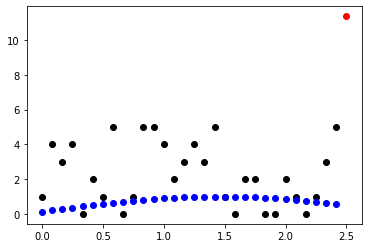

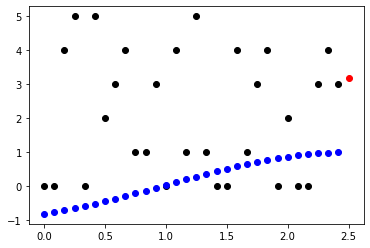

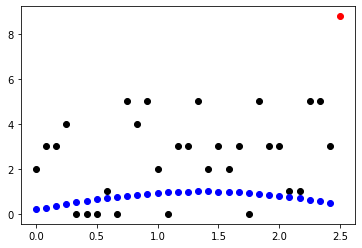

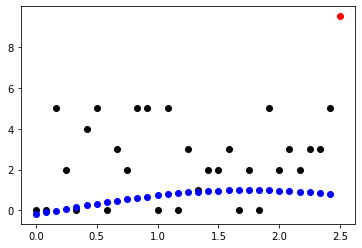

In [12]:
for i in [1, 3, 5, 9]:
  # 인덱스 정보
  plt.scatter(interval[:-1], seq_X[i, :, 0], color='k')
  # 값: 사인 시퀀스 파란색 선으로 나타난 점으로 표시
  plt.scatter(interval[:-1], seq_X[i, :, 1], color='b')
  # 레이블 붉은 점으로 표시
  plt.scatter(interval[-1], Y[i], color='r')
  plt.show()

In [13]:
# 훈련용과 테스트용으로 나누기
train_X = seq_X[:180]
train_y = Y[:180]
test_X = seq_X[180:]
test_y = Y[180:]

In [14]:
import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    # RNN 유닛의 수를 앞의 예제와 같이 10개로 설정, 20개의 연결
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape = [seq_len, 2]),
    tf.keras.layers.Dense(1)
])

simpleRNN_model.compile(optimizer = 'adam', loss = 'mse')
simpleRNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 10)                130       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 1s 8ms/step - loss: 64.6109
Epoch 2/150
6/6 [==============================] - 0s 7ms/step - loss: 62.3145
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 59.8791
Epoch 4/150
6/6 [==============================] - 0s 6ms/step - loss: 57.5940
Epoch 5/150
6/6 [==============================] - 0s 8ms/step - loss: 55.4317
Epoch 6/150
6/6 [==============================] - 0s 7ms/step - loss: 53.2924
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 51.4889
Epoch 8/150
6/6 [==============================] - 0s 7ms/step - loss: 49.7596
Epoch 9/150
6/6 [==============================] - 0s 6ms/step - loss: 48.2712
Epoch 10/150
6/6 [==============================] - 0s 6ms/step - loss: 46.8944
Epoch 11/150
6/6 [==============================] - 0s 6ms/step - loss: 45.7764
Epoch 12/150
6/6 [==============================] - 0s 7ms/step - loss: 44.6496
Epoch 13/150
6/6 [==============================]

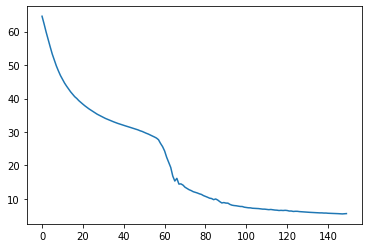

In [15]:
history = simpleRNN_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

6/6 [==============================] - 0s 3ms/step


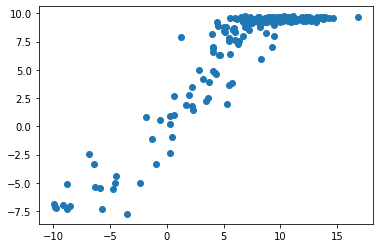

1/1 [==============================] - 0s 19ms/step


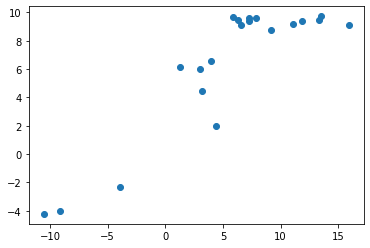

In [16]:
# 훈련 데이터에 대한 예측 결과와 실제 정답을 비교
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

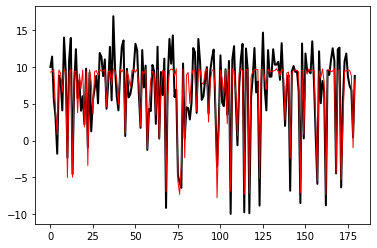

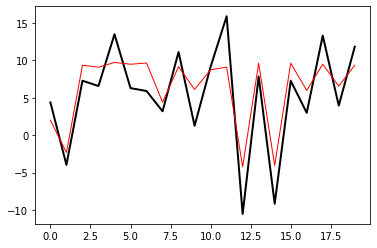

In [17]:
# 훈련용 데이터의 정답과 예측 값, 검증용 데이터의 정답과 예측값을 데이터에 들어있는 순서대고 그리기
# 정답값 검정색
plt.plot(train_y, c='k', linewidth=2)
# 예측값 빨간색
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
# 정답값 검정색
plt.plot(test_y, c='k', linewidth=2)
# 예측값 빨간색
plt.plot(test_y_hat, c='r', linewidth=1)

In [18]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer = 'adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                520       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 2s 15ms/step - loss: 80.7835
Epoch 2/150
6/6 [==============================] - 0s 15ms/step - loss: 78.6949
Epoch 3/150
6/6 [==============================] - 0s 12ms/step - loss: 76.6681
Epoch 4/150
6/6 [==============================] - 0s 13ms/step - loss: 74.7938
Epoch 5/150
6/6 [==============================] - 0s 14ms/step - loss: 73.0043
Epoch 6/150
6/6 [==============================] - 0s 14ms/step - loss: 71.2078
Epoch 7/150
6/6 [==============================] - 0s 14ms/step - loss: 69.4462
Epoch 8/150
6/6 [==============================] - 0s 16ms/step - loss: 67.6229
Epoch 9/150
6/6 [==============================] - 0s 13ms/step - loss: 65.7345
Epoch 10/150
6/6 [==============================] - 0s 12ms/step - loss: 63.7303
Epoch 11/150
6/6 [==============================] - 0s 13ms/step - loss: 61.6410
Epoch 12/150
6/6 [==============================] - 0s 13ms/step - loss: 59.4956
Epoch 13/150
6/6 [===================

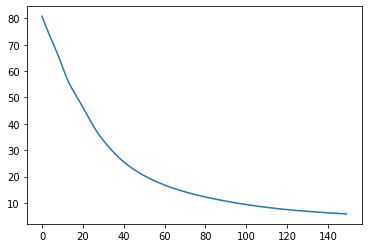

In [19]:
# 훈련과 같은 방식으로 에폭의 수 150개로 지정
history = LSTM_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

6/6 [==============================] - 1s 5ms/step


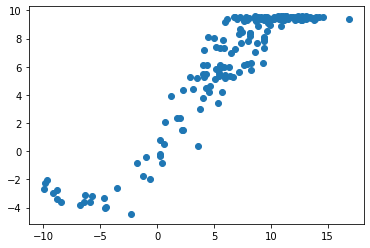

1/1 [==============================] - 0s 21ms/step


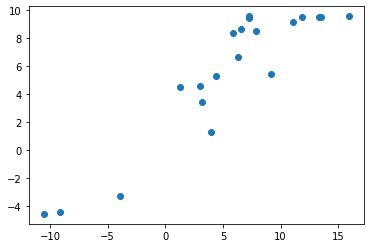

In [20]:
# LSTM 모델이 훈련 데이터와 검증용 데이터에 대해 얼마나 예측을 잘 하는지 같은 방식으로 살펴보기
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

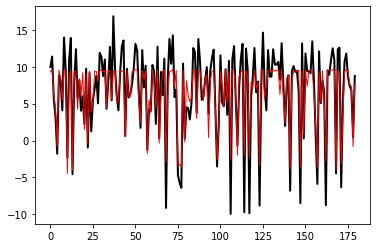

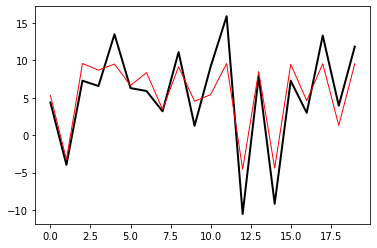

In [21]:
# 훈련 데이터의 정답과 예측값 검증용 데이터의 정답과 예측값을 데이터에 들어있는 순서대로 그려서 확인
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [30]:
# GRU 모델을 만들기
GRU_model = tf.keras.Sequential([
    # 텐서플로우 모델 업데이트로 입력값을 조정하였습니다.
    tf.keras.layers.GRU(units = 10, return_sequences=False,
                        input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

Epoch 1/150
6/6 [==============================] - 3s 17ms/step - loss: 70.2411
Epoch 2/150
6/6 [==============================] - 0s 16ms/step - loss: 67.9560
Epoch 3/150
6/6 [==============================] - 0s 15ms/step - loss: 65.7118
Epoch 4/150
6/6 [==============================] - 0s 17ms/step - loss: 63.6467
Epoch 5/150
6/6 [==============================] - 0s 16ms/step - loss: 61.7242
Epoch 6/150
6/6 [==============================] - 0s 17ms/step - loss: 59.8492
Epoch 7/150
6/6 [==============================] - 0s 15ms/step - loss: 58.0722
Epoch 8/150
6/6 [==============================] - 0s 15ms/step - loss: 56.3803
Epoch 9/150
6/6 [==============================] - 0s 18ms/step - loss: 54.7386
Epoch 10/150
6/6 [==============================] - 0s 16ms/step - loss: 53.1130
Epoch 11/150
6/6 [==============================] - 0s 16ms/step - loss: 51.5759
Epoch 12/150
6/6 [==============================] - 0s 16ms/step - loss: 50.1626
Epoch 13/150
6/6 [===================

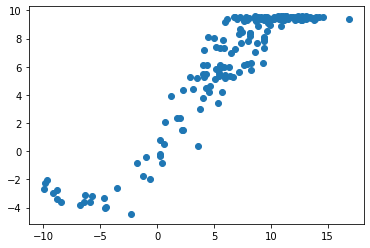

1/1 [==============================] - 0s 21ms/step


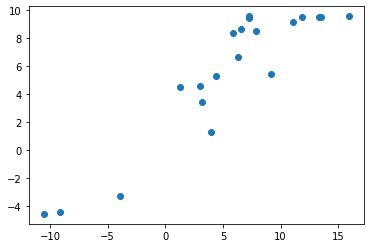

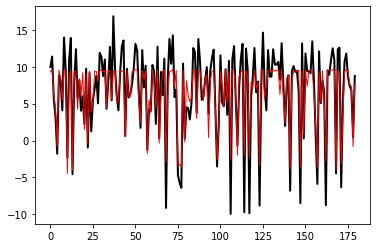

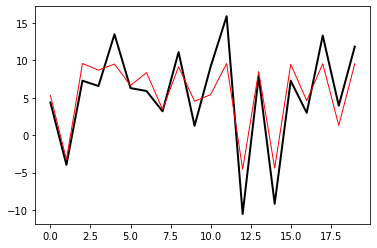

In [29]:
GRU_model.compile(optimizer = 'adam', loss = 'mse')
GRU_model.fit(train_X, train_y, epochs=150)
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)